References:

- 



In [1]:
import astropy.units as u
import numpy as np
%matplotlib inline
#%config InlineBackend.figure_format = ''

import matplotlib.pyplot as plt



wavelen=550*u.nm
D = 85*u.mm
fl_T = 100*u.mm
fl_col = 15*u.mm
bw=100*u.nm
m=fl_T/fl_col


In [2]:

#http://www.stargazing.net/david/constel/howmanystars.html
#Data is based on the Tycho Catalogue which was obtained from page VII of the Millennium Star Atlas, 
#Volume I, Sky Publishing Corporation and European Space Agency.
#The Tycho Catalog is believed to be 99.9 percent complete to magnitude 10.0 and 90 percent 
#complete to magnitude 10.5. Table data for magnitudes 11 to 20 are projected on the average increased of 
#291%. 291 % is the average increase of stars between magnitudes 6 to 7, 7 to 8, 8 to 9, and 9 to 10.


n_stars=15431076 #number of stars 13.49 magnitude or brighter
#n stars per square arcminute:
FOV=0.2*0.2*u.degree*u.degree
((n_stars/(4*np.pi*u.steradian))*FOV).decompose()

<Quantity 14.96239352>

In [3]:

n_stars=1823573 #number of stars 11th magnitude or brighter
#n stars per square arcminute:
FOV=0.2*0.2*u.degree*u.degree
((n_stars/(4*np.pi*u.steradian))*FOV).decompose()

<Quantity 1.76818628>

In [4]:
import astropy.units as u
import numpy as np
RN=2.4*u.electron
N=4 # minimum number of pixels for centroiding
D_i = 25*u.electron/u.second #http://www.mouser.com/ds/2/308/LimitedDataSheet_MT9P031_5100_PB.book-553282.pdf
dx_pupil=1./4. #circular aperture
#dx_pupil=1./np.sqrt(12.) #linear gaia aperture
def tilt_noise(D=85*u.mm,
               mag=11,
               phot_e_rate=None,
               t_exp=1*u.second,
               wavel=550*u.nm,
               RN=RN,
               N=N,
               D_i=D_i,
               QE=.2*u.electron/u.photon,
              bw=100*u.nm):
    if phot_e_rate is None:
        F0=948*u.photon/u.second/u.Angstrom/u.cm**2
        photons=F0*10**(-mag/2.5)
        phot_e_rate=(D/2)**2*np.pi*bw*QE*photons
    #print((e_rate*t_exp).decompose())
    SNR=(phot_e_rate*t_exp).to(u.electron).value/np.sqrt((phot_e_rate*t_exp).to(u.electron).value
                                                    +((RN*N)**2).value
                                                   +(N*D_i*t_exp).to(u.electron).value)
    #SNR=np.sqrt(phot_e_rate.decompose().value)
    #print((phot_e_rate.decompose()))
    err= ((1/(4*np.pi)*wavel/(dx_pupil*D)/SNR)*u.radian).to(u.arcsec)
   # print(err)
    #print(SNR,)
    return err

def tilt_noise_photons(photons,wavel=550*u.nm,D=60*u.mm):
    #print((e_rate*t_exp).decompose())
    err= ((1/(4*np.pi)*wavel/(dx_pupil*D)/np.sqrt(photons))*u.radian).to(u.arcsec)

    return err
tilt_noise(mag=11)

<Quantity 0.02470678 arcsec>

In [5]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#webplotdigitizer, Bahcal fig 4c. 90 deg curve
stars_vs_mag_per_area=np.array([[4, 0.0009322967770947209],
#[16.565096952908586, 127.33916381695829],
[6.016620498614959, 0.0067299238746691544],
[7.567867036011082, 0.037579743006922926],
[9.041551246537397, 0.16853083886116818],
[10.903047091412741, 0.9768534944171365],
[12.299168975069252, 4.2229129773299645],
[13.772853185595572, 15.212740978116553],
[15.246537396121884, 52.838170261410006],
]).T
stars_vs_mag_per_mag_area90=np.array([[4.086052552544643, 0.010818027701937113],
[5.040217923926848, 0.028644042979198935],
[6.337961231038355, 0.08995017939183181],
[7.203544952078866, 0.19734197861592692],
[9.019184260581378, 0.9177898027285929],
[10.662718463994603, 3.8529822498886115],
[12.649830603137135, 19.183695757125783],
[14.889093792645598, 80.46689281114237],
[17.463715350042946, 256.5806083003551],
[19.433756079055385, 507.2020056389239],
[24.56023731367663, 1504.838784408376]]).T

stars_vs_mag_per_mag_area20=np.array([#add data point for ~3 zero mag stars?
                                      [4.873487151656297, 0.034582880846553615],
[7.174270645078009, 0.4048305362256166],
[7.651195262156795, 0.6531332071660202],
[9.295361740019287, 2.837357079246598],
[12.322059528639398, 38.0462649044999],
[15.348125042810251, 493.0053253347176],
[18.532385624186603, 3334.0742917674474]
                                     ]).T

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return (x*a + b +c*x**2)
xdata=stars_vs_mag_per_mag_area90[0]
ydata=stars_vs_mag_per_mag_area90[1]
ydata



array([1.08180277e-02, 2.86440430e-02, 8.99501794e-02, 1.97341979e-01,
       9.17789803e-01, 3.85298225e+00, 1.91836958e+01, 8.04668928e+01,
       2.56580608e+02, 5.07202006e+02, 1.50483878e+03])

In [7]:
# stars over full sky
#10**(func(np.array([6.]), *popt))*4*180**2
# yale bright star catalog has 9k stars V=7

In [8]:


from scipy import integrate
x=stars_vs_mag_per_mag_area90[0]
y=stars_vs_mag_per_mag_area90[1]
from scipy.interpolate import interp1d
f2 = interp1d(x, y, kind='linear',bounds_error=False,
              fill_value="extrapolate")
x2 = np.linspace( xdata.min(), xdata.max(), num=1000, endpoint=True)
xunity = np.linspace( xdata.max(), xdata.max(), num=int(xdata.max())
                     , endpoint=True)

y2=f2(x2)
yunity=f2(xunity)


lim=13
ind=x2<lim
x=x2[ind]
y=y2[ind]
print("N-stars in sky brighter than "+str(lim)
      +",assuming this relations: "+str(round(integrate.trapz(y, x)*180**2*4/np.pi**2)))

#def brightest_star_field(mags, stars, FOV):
    

N-stars in sky brighter than 13,assuming this relations: 471259


In [9]:
omega_sky=180**2*4*np.pi/np.pi**2*u.deg**2
bw=100*u.nm


#see kruzhilov_evaluation_2012 for real translation of star tracker bands into survey catalogs
#here we
f0=948*u.photon/u.angstrom/u.s/u.cm**2
def fluxV(Vmag):
    return f0*10**(-Vmag/2.5)
#ind=(x2<5.7)& (x2>4.9)
ind=(x2<13)& (x2>0)


x=x2[ind]
y=y2[ind]

visible_stars_flux=integrate.trapz(y*10**(-x/2.5), x)*f0/u.deg**2

#integrate.trapz(y2, x2)*asteria_FOV/u.deg**2
visible_stars_flux

<Quantity 2.25242486 ph / (Angstrom cm2 deg2 s)>

In [10]:
asteria_FOV=11.2*9.6*u.deg**2
asteria_A=(60.7*u.mm/2)**2*np.pi
asteria_etendue=asteria_FOV*asteria_A
asteria_etendue
asteria_t_exp=50*u.millisecond
QE=.25*u.electron/u.photon

In [11]:
from skyfield.api import Star, load
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

df[df.magnitude<4].size

#bright star catalog from vizier
from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
table = parse_single_table("vizier_votable.vot")
#table.fields

In [12]:
binwidth=.25
bins=np.arange(-0.5,15.5,binwidth)
brighthist=np.histogram(table.array["Vmag"],bins=bins)
brightstarcat=brighthist[0]/omega_sky.to(u.deg**2).value/binwidth
hiphist=np.histogram(df.magnitude,bins=bins)[0]/omega_sky.to(u.deg**2).value/binwidth

bin_mags=np.array(brighthist[1])[:-1]+.5 #center magnitude


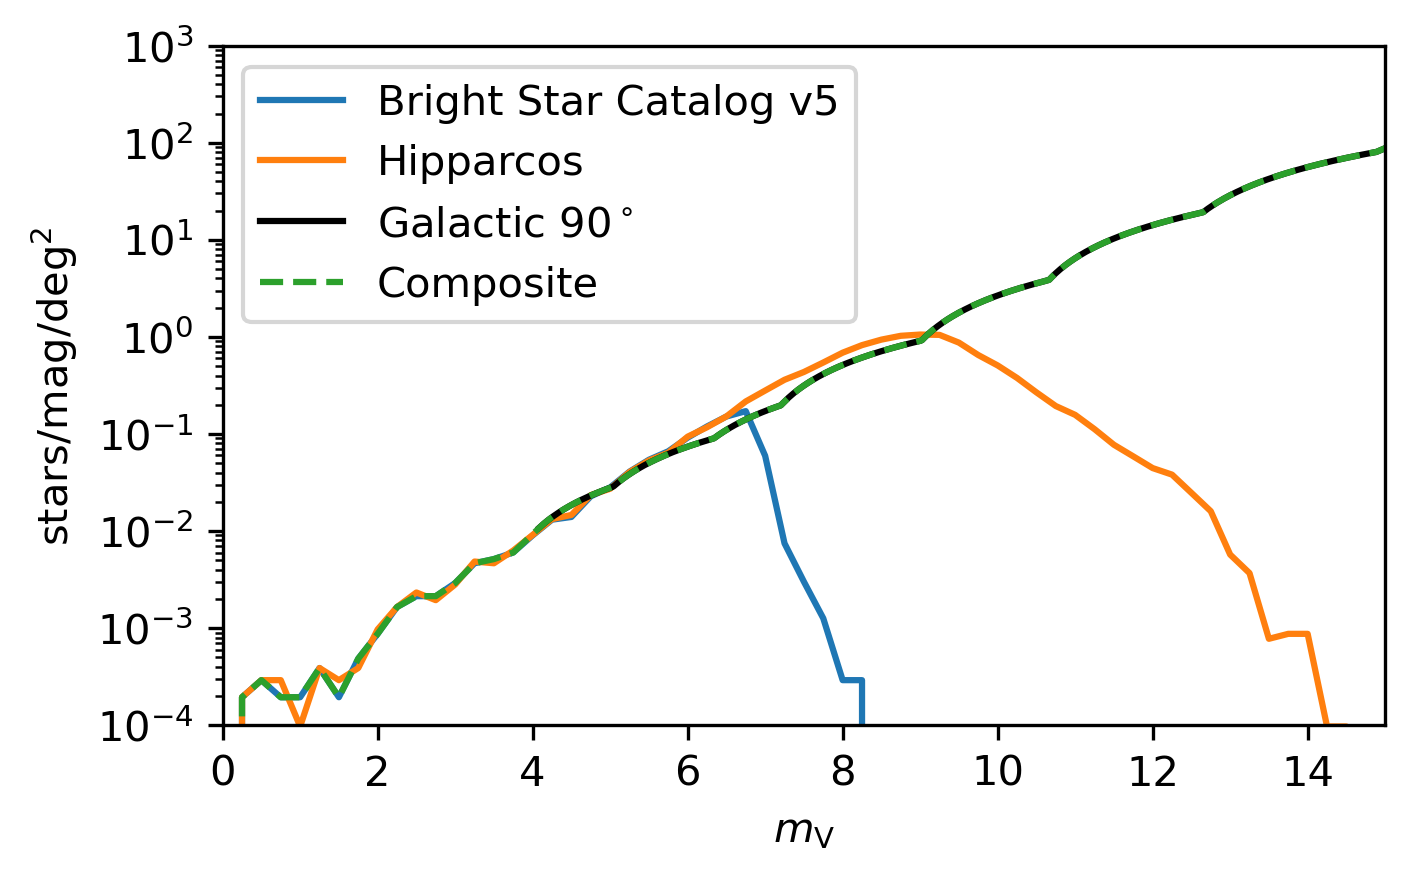

In [13]:
#plt.hist(df.magnitude[df.magnitude<7],bins=np.arange(0,8,1),alpha=.5)
plt.figure(figsize=[5,3],dpi=300)

plt.plot(bin_mags,brightstarcat,label="Bright Star Catalog v5")
plt.plot(bin_mags,hiphist,label="Hipparcos")
composite=np.hstack([brightstarcat[bin_mags<4],y2])
composite_x=np.hstack([bin_mags[bin_mags<4],x2])
plt.plot(x2,y2,color="k",label="Galactic $90^\circ$")
plt.plot(composite_x,composite,"--",label="Composite")


plt.xlim([0,15])
plt.ylim([.0001,1e3])

plt.yscale("log")
plt.xlabel(r'$m_{\rm V}$')
plt.ylabel( "stars/mag/deg$^2$")
plt.legend()
plt.savefig("../frontiers_paper/figures/star_density.pdf",bbox_inches="tight")

In [14]:
max_d=95*u.mm
max_FOV=10**2*u.deg**2
max_etendue=(max_d/2)**2*np.pi*max_FOV
QE

<Quantity 0.25 electron / ph>

/home/edouglas/miniconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/edouglas/miniconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/edouglas/miniconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/edouglas/miniconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/edouglas/miniconda3/envs/astroconda/lib/python3.7/site-packages/astrop

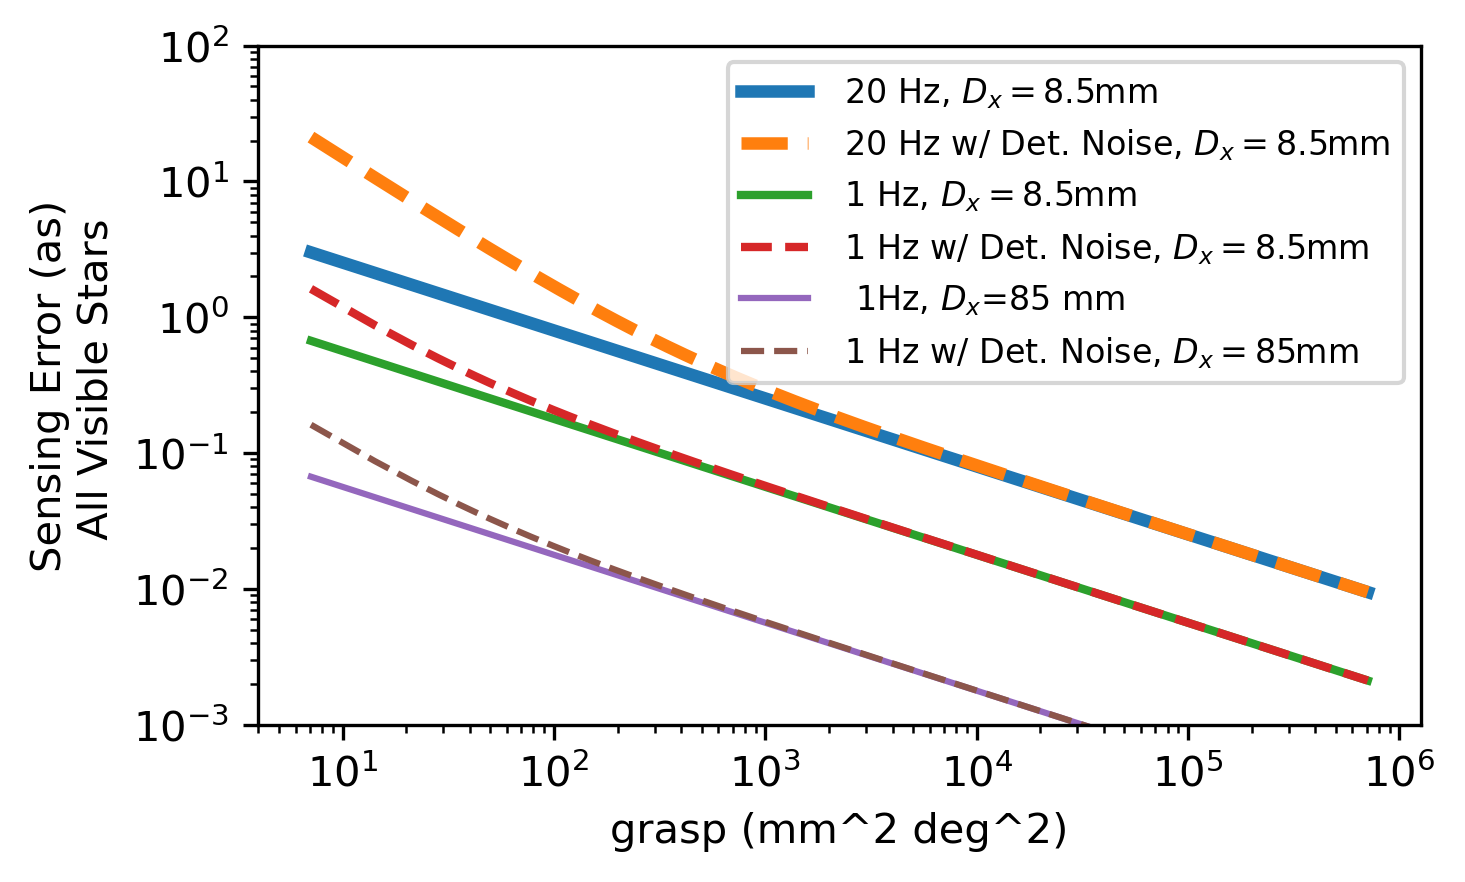

In [37]:
plt.figure(figsize=[5,3],dpi=300)
et_asteria=100*u.deg**2*asteria_A
demi_FOV=(1*u.deg)**2

et_DeMi=demi_FOV*12.5**2*np.pi*u.mm**2
et_ST=(6*u.mm)**2*np.pi*(7.5*u.deg)**2*np.pi
et=np.arange(0,1,.00001)*max_etendue


asteria_stars_FOV=composite/u.deg**2*asteria_FOV#*10
demi_stars_FOV=composite/u.deg**2*demi_FOV#*10

#plt.plot(et,tilt_noise_photons((fluxV(composite_x[demi_stars_FOV>1][0])*
#                                et/demi_FOV*bw*t_expasteria_t_exp*QE).decompose().value))
t_exp=0.05*u.second
visible_photons_sec=visible_stars_flux*et*bw*QE


#plt.plot(et,tilt_noise_photons((fluxV(composite_x[demi_stars_FOV>1][0])*
#                                et/asteria_FOV*bw*t_exp*QE).decompose().value),
#        label="Brightest star in 1deg field [20 Hz]")
plt.plot(et,tilt_noise_photons((visible_photons_sec*t_exp).to(u.electron).value,D=8.5*u.mm), 
                "-",linewidth=3, label=" 20 Hz, $D_x=$8.5mm")


plt.plot(et,(tilt_noise(D=8.5*u.mm,t_exp=t_exp,
              phot_e_rate=(visible_stars_flux*et*bw*QE).decompose())), 
               "--",linewidth=3, label=" 20 Hz w/ Det. Noise, $D_x=$8.5mm")
#plt.plot(et,tilt_noise_photons((visible_photons_sec*0.01*u.s).to(u.electron).value,D=8.5*u.mm), 
#                "-",linewidth=4, label="100 Hz, $D_x=$8.5mm")


#plt.plot(et,tilt_noise_photons((visible_photons_sec*t_exp).to(u.electron).value),
 #       "-.", label=" 20 Hz, $D_x=$60 mm ")


#plt.plot(et,(tilt_noise(D=60*u.mm, t_exp=t_expasteria_t_exp,
#                        phot_e_rate=(visible_stars_flux*et*bw*QE))),
#                "--", label=" 20Hz w/ Det. Noise")

#plt.plot(et,(tilt_noise(D=8.5*u.mm,t_exp=1*u.s,
#               phot_e_rate=(visible_stars_flux*et*bw*QE).decompose())),
#                "-", label=" 1 Hz w/ Det. Noise, $D_x=$8.5mm")

plt.plot(et,tilt_noise_photons((visible_photons_sec*1*u.s).to(u.electron).value,D=8.5*u.mm), 
                "-", linewidth=2,label=" 1 Hz, $D_x=$8.5mm")


plt.plot(et,(tilt_noise(D=8.5*u.mm,t_exp=1*u.s,
               phot_e_rate=(visible_stars_flux*et*bw*QE).decompose())),
               "--", linewidth=2,label=" 1 Hz w/ Det. Noise, $D_x=$8.5mm")




plt.plot(et,tilt_noise_photons((visible_photons_sec*1*u.s).to(u.electron).value,D=85*u.mm), 
       "-", label="  1Hz, $D_x$=85 mm")


plt.plot(et,(tilt_noise(D=85*u.mm,t_exp=1*u.s,
               phot_e_rate=(visible_stars_flux*et*bw*QE).decompose())),
               "--", label=" 1 Hz w/ Det. Noise, $D_x=$85mm")





#plt.plot(et,tilt_noise_photons((visible_stars_flux
#                                *et*bw*asteria_t_exp*QE).to(u.photon).value),
#        "-")
'''plt.text(et_asteria.value,
         tilt_noise_photons((visible_stars_flux
                             *et_asteria*bw*t_exp*QE).to(u.electron).value).value,
        "Asteria")



plt.text(et_ST.value,
         tilt_noise_photons((visible_stars_flux
                             *et_ST*bw*t_exp*QE).to(u.electron).value,
                           D=12*u.mm).value,
        "Star Tracker")

plt.text(et_DeMi.value,
         tilt_noise_photons((visible_stars_flux
                             *et_DeMi*bw*t_exp*QE).to(u.electron).value,
                           D=12*u.mm).value,
        "DeMi")
'''
plt.xscale("log")

plt.yscale("log")
plt.ylim([1e-3,1e2])
plt.xlabel("grasp (mm^2 deg^2)")
plt.ylabel("Sensing Error (as)\n All Visible Stars")
et_asteria,et_DeMi,et_ST
plt.legend(fontsize=8,loc="upper right")
plt.savefig("../frontiers_paper/figures/sensing_vs_etendue.pdf",bbox_inches="tight")

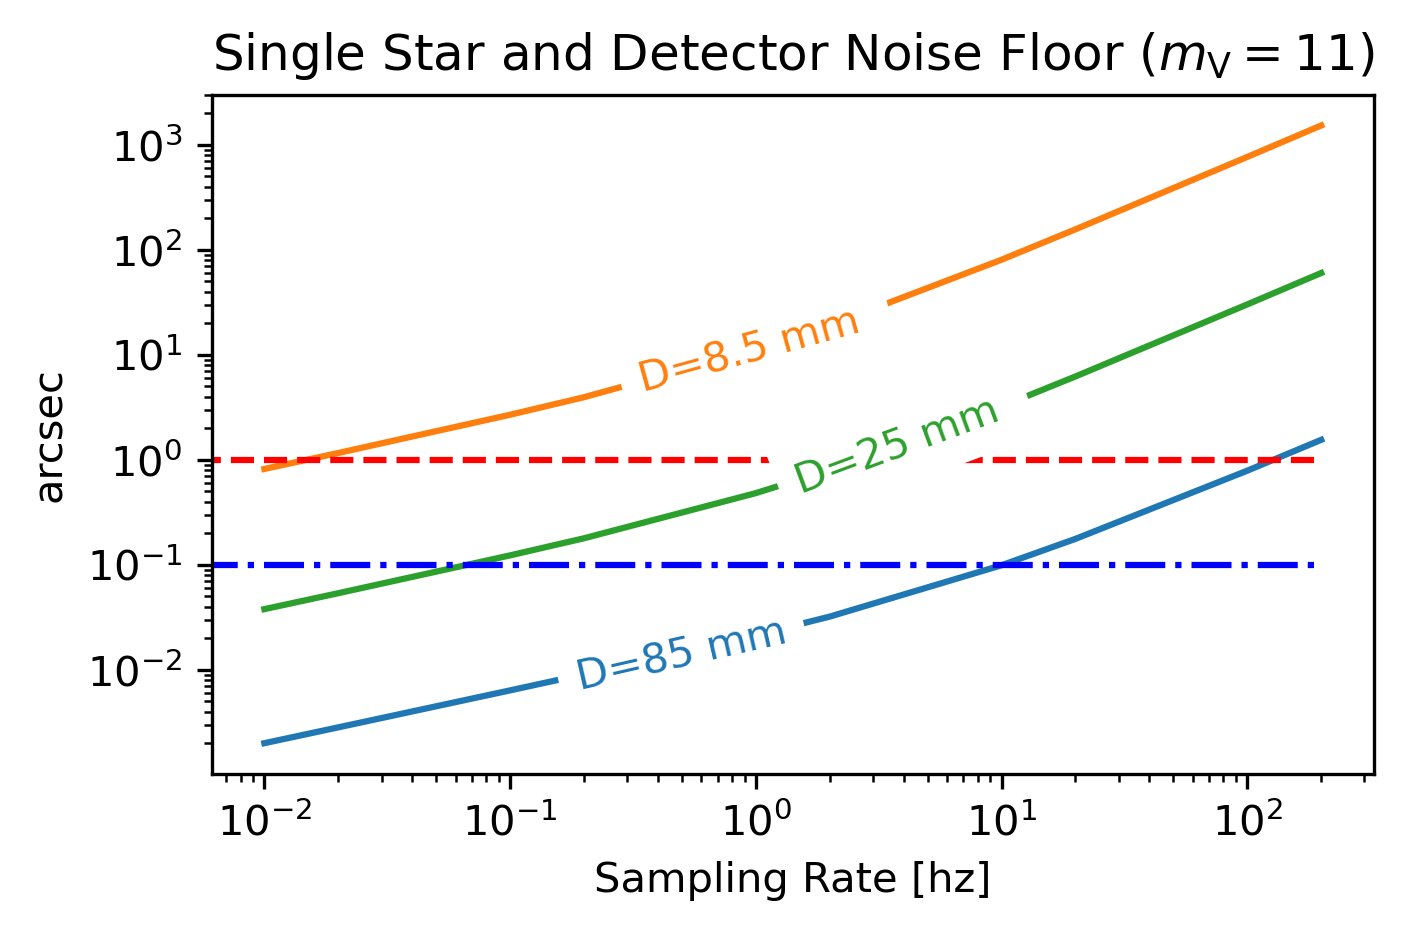

In [16]:
plt.figure(figsize=[5,3],dpi=300)
etimes=np.array([100,50,10,5,1,.5,.1,.05,0.01,.005])*u.s
x=(1/etimes).value

mag=11
plt.plot(x,(tilt_noise(t_exp=1*u.s/x,D=85*u.mm,
               mag=11,
              # phot_e_rate=None,
               #t_exp=1*u.second,
               #wavel=550*u.nm,
               RN=RN,
               N=4,
               D_i=D_i,
               QE=.25*u.electron/u.photon,
              bw=100*u.nm
          )).value,label="D=85 mm")
plt.plot(x,(tilt_noise(t_exp=1*u.s/x,D=8.5*u.mm,
               mag=11,
              # phot_e_rate=None,
               #t_exp=1*u.second,
               #wavel=550*u.nm,
               RN=RN,
               N=4,
               D_i=D_i,
               QE=.25*u.electron/u.photon,
              bw=100*u.nm
          )).value,label="D=8.5 mm ")
plt.plot(x,(tilt_noise(t_exp=1*u.s/x,D=2.5*u.cm,
               mag=11,
              # phot_e_rate=None,
               #t_exp=1*u.second,
               #wavel=550*u.nm,
               RN=RN,
               N=4,
               D_i=D_i,
               QE=.25*u.electron/u.photon,
              bw=100*u.nm
          )).value,label="D=25 mm ")

#plt.plot(etimes.value,np.array(ce_vs_t).value)
#x=(1/etimes/10).value
#x.sort()

    
#plt.plot(x,u.Quantity(ce_vs_t_11_85,u.arcsecond).value,label="D=8.5 cm ")
#plt.plot(x,u.Quantity(ce_vs_t_11_350,u.arcsecond).value,label="D=35 cm ")

#plt.plot(x,u.Quantity(ce_vs_t_11_25,u.arcsecond).value,label="D=2.5 cm ")


plt.xscale("log")
plt.title("")
plt.yscale("log")
plt.ylabel("arcsec")
from labellines import labelLine, labelLines
plt.plot([0,200],[1,1],"--",color="red")

plt.plot([0,200],[.1,.1],"-.",color="blue")
plt.title(r"Single Star and Detector Noise Floor ($m_{\rm V}=$%i)"%(mag))

labelLines(plt.gca().get_lines(),xvals=[.50,1, 4])
plt.xlabel("Sampling Rate [hz]")

plt.savefig("../frontiers_paper/figures/control_11_mag.pdf",bbox_inches="tight")

In [17]:
tilt_noise(mag=11)

<Quantity 0.02470678 arcsec>